# CBS311 — Fundamentals of Data Science
## Project: FIFA21 Player Value Prediction

Sayan Sinha  
2023BCY0006

---

### **Objective**
To predict a FIFA player's market value category using various player attributes and performance statistics.

---

### **Steps to be covered:**
1. Importing Required Libraries  
2. Loading and Inspecting the Dataset  
3. Data Cleaning and Type Conversion  
4. Exploratory Data Analysis (EDA) & Visualization  
5. Feature Engineering and Selection  
6. Preprocessing and Encoding  
7. Model Building — Random Forest & XGBoost  
8. Evaluation and Overfitting Check  
9. Conclusion and Insights


# Please perform a pip install requirements.txt in terminal before proceeding

Importing required libraries

In [302]:
import pandas as pd, numpy as np, re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Importing all the necessary libraries for data handling, ML, and plotting.
sns.set(style='whitegrid')
%matplotlib inline

## Loading the Dataset
We load the FIFA21 male player dataset and inspect its structure.

In [303]:
df = pd.read_csv("fifa21_male2.csv", low_memory=False)
print("Dataset shape:", df.shape) # Loading the FIFA21 CSV file into a pandas DataFrame and checking its shape.
df.head(3)

Dataset shape: (17125, 107)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male


In [304]:
df.info() #Using .info() to get a quick overview of column types and null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [305]:
df.describe() #Running .describe() to get a statistical summary of the numerical data.

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


Data Cleaning and Conversion

### Removing identifier and non-useful columns
These columns do not help in prediction and are removed.


In [306]:
drop_cols = ['ID', 'Player Photo', 'Club Logo', 'Flag Photo', 'Name','Gender']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore') # Removing irrelevant columns like 'ID', 'Name', and 'Player Photo' that won't help the model.
df.head(3)

,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Team & Contract,Height,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
1,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
2,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0


### Converting monetary values (Value, Wage) from strings (e.g., €20M) to numeric format
We create numeric versions of the Value and Wage columns.


In [307]:
def parse_euro(x):# This function cleans string columns like 'Value' and 'Wage' (e.g., '€1.1M') into proper numbers.
    try:
        s = str(x).replace('€', '').strip()
        if s.endswith('M'): return float(s[:-1]) * 1e6
        if s.endswith('K'): return float(s[:-1]) * 1e3
        return float(s)
    except:
        return np.nan

if 'Value' in df.columns:
    df['Value_num'] = df['Value'].apply(parse_euro)
if 'Wage' in df.columns:
    df['Wage_num'] = df['Wage'].apply(parse_euro)
df = df[(df['Value_num'] > 0) & (df['Wage_num'] > 0)].copy() #Many free agents and players who will retire are present in df who have 0 as 'Value_num' or 0 as 'Wage_num' so removing them will be better
df[['Value', 'Value_num', 'Wage', 'Wage_num']].head(3)

,Value,Value_num,Wage,Wage_num
0,€625K,625000.0,€7K,7000.0
1,€600K,600000.0,€7K,7000.0
2,€1.1M,1100000.0,€15K,15000.0


### Cleaning star columns (W/F, SM, IR)
These contain symbols like ★ which we remove and convert to numeric.


In [308]:
for col in ['W/F', 'SM', 'IR']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('★', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce') # Stripping the '★' symbol from skill columns ('W/F', 'SM', 'IR') and converting them to numbers.
df[['W/F', 'SM', 'IR']].head(3)

,W/F,SM,IR
0,3,2,2
1,4,3,1
2,4,4,2


### Converting height (e.g., 5'11") to centimeters
We extract feet and inches and convert them to centimeters.


In [309]:
def height_to_cm(h):# Converting the height column from feet/inches (e.g., "5'10"") to a numeric value in centimeters.
    try:
        ft, inch = re.findall(r"(\d+)'(\d+)", str(h))[0]
        return (int(ft) * 12 + int(inch)) * 2.54
    except:
        return np.nan

if 'Height' in df.columns:
    df['Height_cm'] = df['Height'].apply(height_to_cm)
    df.drop(columns=['Height'], inplace=True)
df[['Height_cm']].head(3)


,Height_cm
0,182.88
1,177.80
2,175.26


### Converting weight (e.g., "176lbs") to kilograms
We strip "lbs" and convert to kilograms.


In [310]:
def weight_to_kg(w):# Converting the 'Weight' column from 'lbs' (string) to a numeric value in 'kg'.
    try:
        return float(str(w).replace('lbs', '').strip()) * 0.453592
    except:
        return np.nan

if 'Weight' in df.columns:
    df['Weight_kg'] = df['Weight'].apply(weight_to_kg)
    df.drop(columns=['Weight'], inplace=True)
df[['Weight_kg']].head(3)


,Weight_kg
0,82.100152
1,64.863656
2,73.028312


### Handling missing values
We fill missing numeric values with the median and categorical values with 'Unknown'.


In [311]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df.loc[:, num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    m = df[c].mode(dropna=True)
    if not m.empty:
        df[c] = df[c].fillna(m.iloc[0])# Handling missing data by filling numeric NaNs with the median and categorical NaNs with the mode.

df.isnull().sum().sort_values(ascending=False).head(10)


Age                0
OVA                0
Nationality        0
Club               0
BOV                0
BP                 0
Position           0
POT                0
Team & Contract    0
foot               0
dtype: int64

### Visualization to understand data distributions and relationships
We plot histograms, boxplots, scatterplots, and a correlation heatmap.


## Correlation Heatmap

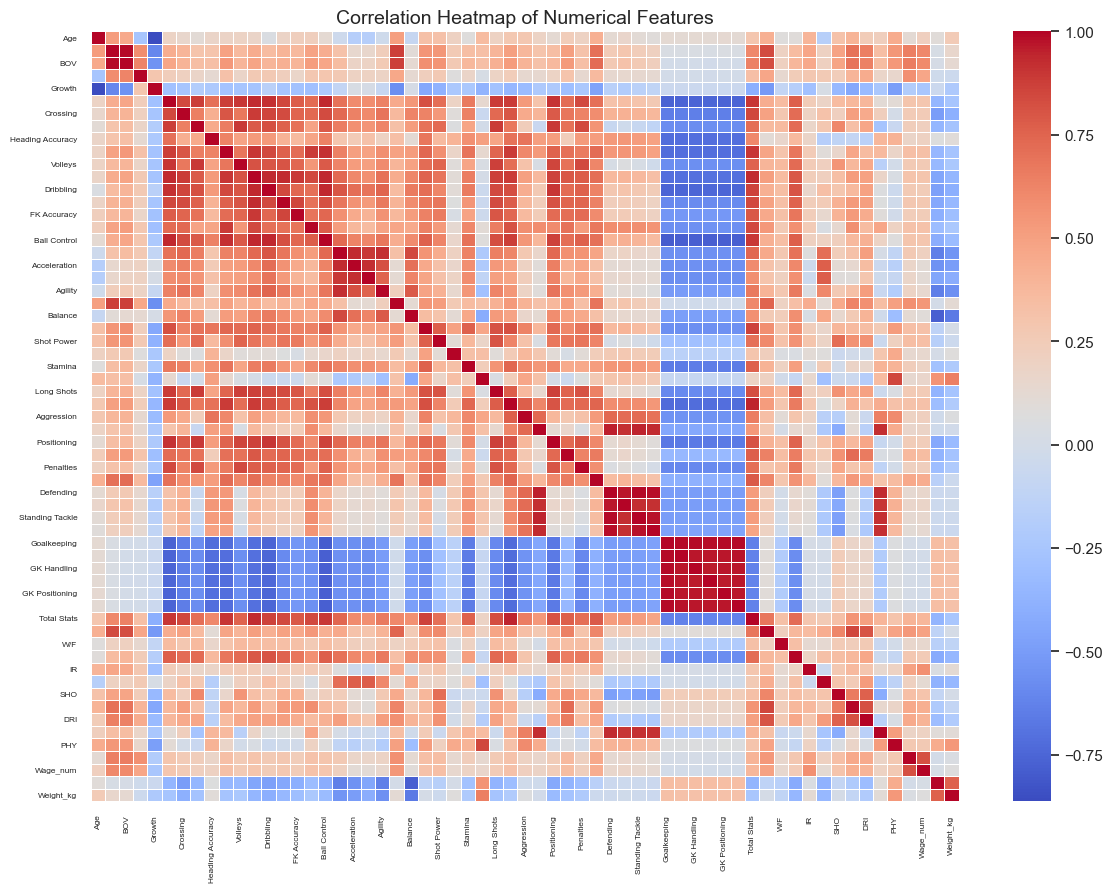

In [312]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=90, fontsize=6) 
plt.yticks(rotation=0, fontsize=6)  
plt.show() # Plotting a correlation heatmap to visualize relationships between all the numeric features.


### Dropping columns with low correlation to target

In [313]:
df.drop(columns=['Loan Date End','Joined','Release Clause','Contract','Team & Contract'], inplace=True) # dropping columns with very low correlation to target.

### Correlation Heatmap Analysis

The correlation heatmap visualizes how various numerical attributes in the FIFA dataset are interrelated.  

We can observe clear clusters of highly correlated features:
- **Defending**, **Standing Tackle**, **Marking**, and **Sliding Tackle** show strong positive correlations, indicating that these skills move together — players good in one are typically good in others.
- Similarly, **Goalkeeping attributes** such as **GK Diving**, **GK Handling**, **GK Reflexes**, and **GK Positioning** are also closely related, forming another strong feature cluster.
- Offensive skills like **Finishing**, **Positioning**, and **Shot Power** are also positively correlated, which aligns with real-world football dynamics.

Although these features are correlated, **we retain them** instead of dropping or combining them because:
1. Tree-based models like **Random Forest** and **XGBoost** handle multicollinearity internally without performance degradation.  
2. Removing correlated attributes might unintentionally discard valuable domain-specific information (e.g., fine distinctions between “Defending” and “Standing Tackle”).

Hence, all numeric attributes are kept for model interpretability and performance.


## Top 10 Nationalities by Player Count


C:\Users\Sayan Sinha\AppData\Local\Temp\ipykernel_14908\2314633651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nat, x='Count', y='Nationality', palette='viridis')


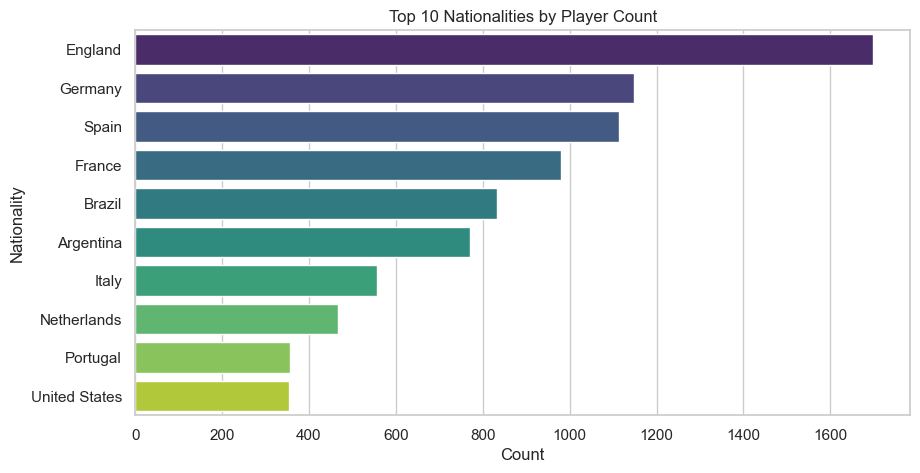

In [314]:
plt.figure(figsize=(10, 5))
top_nat = df['Nationality'].value_counts().head(10).reset_index()
top_nat.columns = ['Nationality', 'Count']

sns.barplot(data=top_nat, x='Count', y='Nationality', palette='viridis')
plt.title("Top 10 Nationalities by Player Count")
plt.xlabel("Count")
plt.ylabel("Nationality")
plt.show() # Plotting a bar chart to see the Top 10 most common nationalities in the dataset.


### Top 10 Nationalities by Player Count

From the bar chart of player nationalities, it is evident that **England** has the highest number of players in the FIFA21 dataset by a significant margin.  
This reflects the extensive size of the English football system, which includes multiple competitive leagues and clubs.  

Following England, **Germany**, **Spain**, and **France** also contribute large player counts, consistent with their well-established football infrastructures.  

This nationality distribution provides useful context for understanding the player pool — though we do not encode it directly in model interpretation, it can indirectly influence club frequency and overall player exposure in the dataset.


## Value vs Age Scatterplot


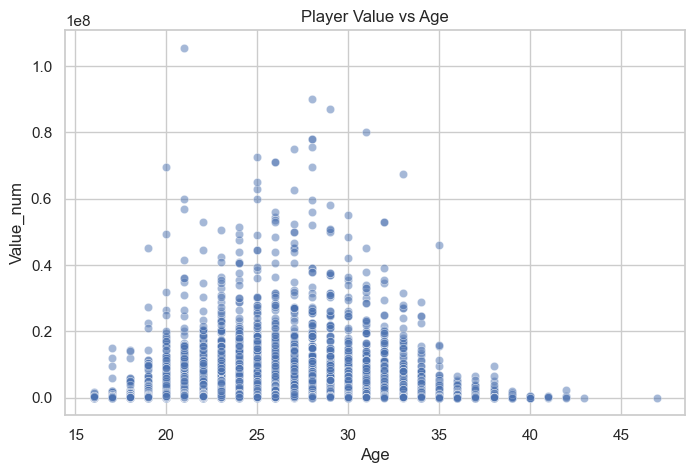

In [315]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Value_num', alpha=0.5)
plt.title("Player Value vs Age")
plt.show() # Creating a scatterplot to see the relationship between player 'Age' and 'Value'.


### Player Value vs Age

The scatterplot of **Age** versus **Player Market Value** reveals a clear pattern:
- Player market value **rises sharply between ages 20 and 30**, which is typically the peak performance window for professional footballers.
- Beyond 30, player value generally **declines gradually**, reflecting the expected physical and performance decline with age.
- Younger players (below 20) show a wider spread — a few have very high values due to exceptional potential, while others remain undervalued as they are still developing.

Overall, this visualization supports the intuition that player value is **strongly age-dependent**, peaking during prime playing years.


## Feature engineering — Frequency encoding for Club and Nationality

In [316]:
df['Club'] = df['Club'].astype('string')
df['Nationality'] = df['Nationality'].astype('string')
df['Club_freq'] = df['Club'].map(df['Club'].value_counts(normalize=True))
df['Nationality_freq'] = df['Nationality'].map(df['Nationality'].value_counts(normalize=True)) # Using frequency encoding for 'Club' and 'Nationality' since they have too many unique values for one-hot encoding.

## Creating target variable (Value quintiles for classification)


In [317]:
df['Value_q'] = pd.qcut(df['Value_num'].rank(method='first'), q=5, labels=[0,1,2,3,4]).astype(int) # Creating our target variable Value_q by splitting player values into 5 equal-sized bins (quintiles).


## Distribution of target variable against Acceleration,Dribbling,Short Passing,Shot Power,Interceptions,Strength

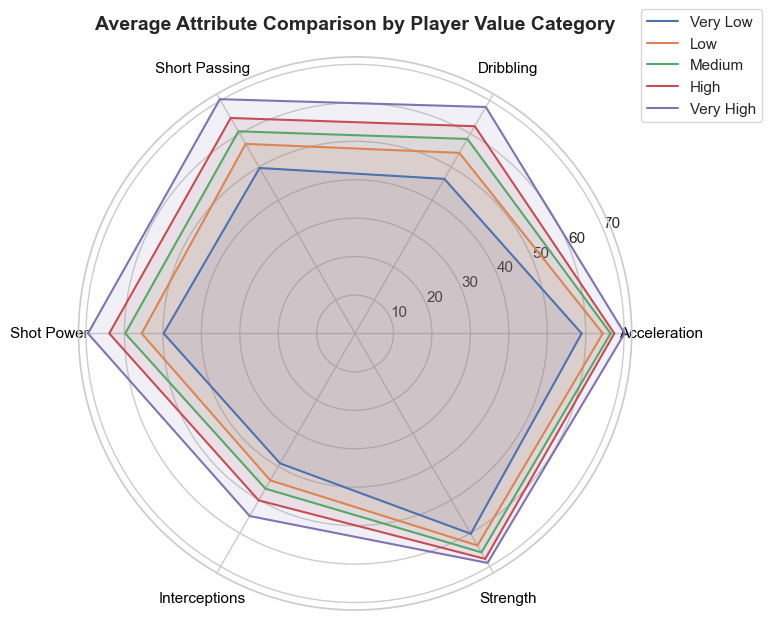

In [318]:
df['Value_cat'] = df['Value_q'].map({
    0: 'Very Low', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
})

attrs = ['Acceleration', 'Dribbling', 'Short Passing', 'Shot Power', 'Interceptions', 'Strength']
available_attrs = [a for a in attrs if a in df.columns]

value_groups = (
    df.groupby('Value_cat')[available_attrs]
      .mean()
      .reindex(['Very Low', 'Low', 'Medium', 'High', 'Very High']) # Generating a radar chart to compare the average attributes for each of the 5 value categories.
)

categories = available_attrs
n = len(categories)
if n == 0:
    print("No specified attribute columns found.")
else:
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    for idx, row in value_groups.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, label=idx)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='black', fontsize=11)
    ax.tick_params(pad=8)

    plt.title('Average Attribute Comparison by Player Value Category', size=14, weight='bold', pad=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
    plt.tight_layout()
    plt.show()

The biggest gaps between value tiers are in Short Passing, Dribbling, and Shot Power, which means the market rewards players who can keep the ball, beat defenders, and convert chances. Those are the traits that separate a good player from a difference maker.

By contrast, Acceleration and Strength bunch up in the top two tiers. Most elite players are already fast and strong, so adding a little more pace or muscle doesn’t move their price much diminishing returns at the top. Practically, developing technical quality is the clearest path to a higher valuation that is marginal physical gains matter less once you’re already in elite territory.

## How the Top 3 variables affect the target value

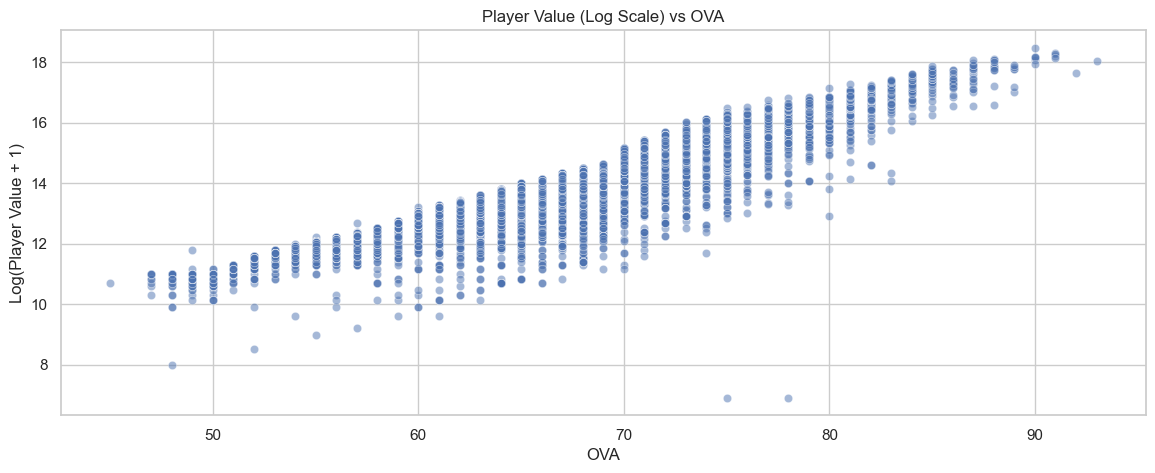

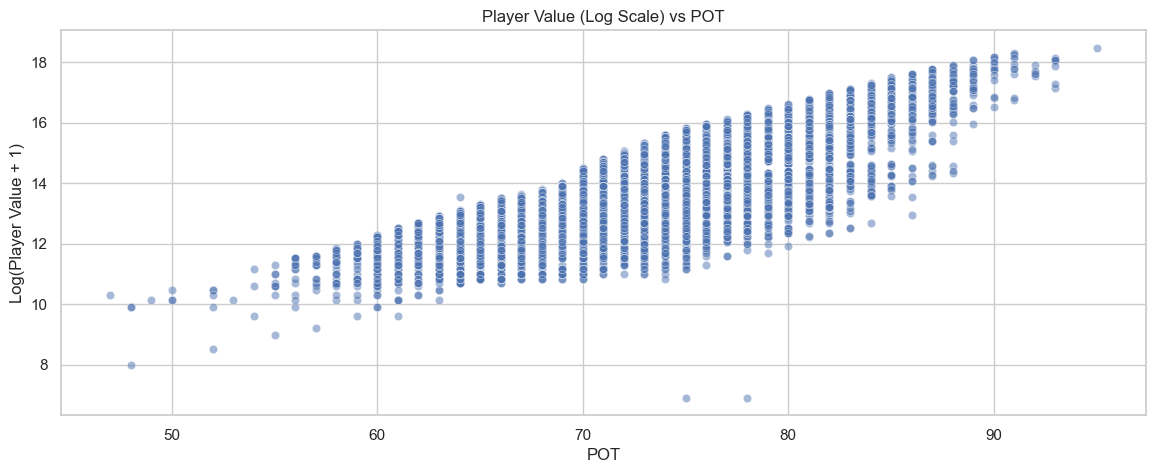

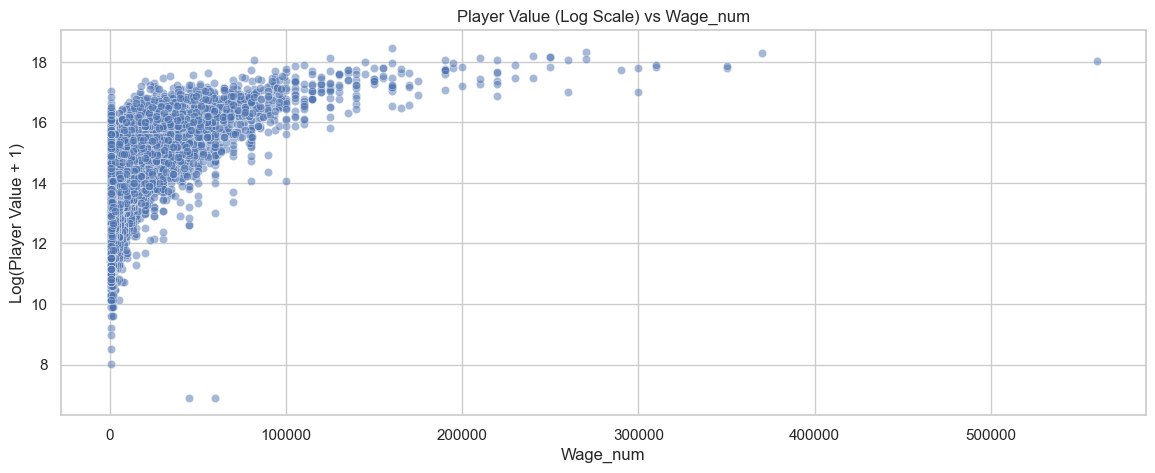

In [319]:
top_features = ['OVA', 'POT', 'Wage_num']

for col in top_features:
    plt.figure(figsize=(14, 5))
    sns.scatterplot(data=df, x=col, y=np.log1p(df['Value_num']), alpha=0.5)
    plt.title(f"Player Value (Log Scale) vs {col}")
    plt.xlabel(col)
    plt.ylabel("Log(Player Value + 1)")
    plt.show()

### Relationship Between Key Attributes and Player Value

We plotted **Overall (OVA)**, **Potential (POT)**, **Wage** against the **log-transformed player value** to better visualize proportional growth and handle large value ranges.

**Observations:**
- **OVA (Overall Rating)** shows a **strong positive correlation** with player market value — as a player’s current ability increases, their value rises sharply.
- **POT (Potential Rating)** also increases proportionally with player value, indicating that clubs pay higher prices for players who are both skilled and have room for growth.
- **Wage** exhibits a **weaker correlation** — while higher wages generally align with higher player values, the trend is less steep. This may be because wages depend on club budgets, contracts, and league economics, not just market valuation.

These visual patterns confirm that **overall performance and potential** are the most direct predictors of market value, while **wage and age** play more nuanced roles.


## Selecting features for model training


In [320]:
X = df.drop(columns=['Value_q', 'Value_num', 'Value', 'Wage','Value_cat'], errors='ignore')
y = df['Value_q'] # Separating the data into our features (X) and the target variable (y) for modeling.

## 18. Preprocessing: Encoding and Scaling


In [321]:
small_card = [c for c in cat_cols if c in X.columns and X[c].nunique() <= 10]
high_card  = [c for c in cat_cols if c in X.columns and X[c].nunique() > 10]
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

pre = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), small_card),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), high_card)
], remainder='drop')
# Setting up a ColumnTransformer to impute medians, one-hot encode, and ordinal-encode our features.
X_pre = pre.fit_transform(X)


## Train-test split


In [322]:
X_pre = pre.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_pre, y, test_size=0.25, stratify=y, random_state=42
) # Applying the preprocessing pipeline and splitting the data into stratified train and test sets.

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (12498, 102)
Testing shape: (4167, 102)


In [323]:
print(X_train.shape) # Quick check on the final shape of the training data after preprocessing.


(12498, 102)


Random Forest Training

In [324]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,            
    min_samples_leaf=5,     
    min_samples_split=10,    
    max_features='sqrt',
    class_weight='balanced_subsample',
    random_state=42,
    n_jobs=-1
) # Initializing and training the Random Forest model, tuning hyperparameters to reduce overfitting.


rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Random Forest Accuracy

In [325]:
yp_rf_train = rf.predict(X_train)
yp_rf_test = rf.predict(X_test)

train_acc_rf = accuracy_score(y_train, yp_rf_train)
test_acc_rf = accuracy_score(y_test, yp_rf_test)
print(f"\n---- RANDOM FOREST ----")
print(f"Random Forest Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest Testing Accuracy:  {test_acc_rf:.4f}")
print(f"Overfit Gap: {abs(train_acc_rf - test_acc_rf):.4f}")# Calculating and printing the training and testing accuracy for the Random Forest model.


---- RANDOM FOREST ----
Random Forest Training Accuracy: 0.9006
Random Forest Testing Accuracy:  0.8560
Overfit Gap: 0.0446


Random Forest Report

In [326]:
print("Classification Report (Random Forest):")
print(classification_report(y_test, yp_rf_test))# Printing a detailed classification report for the Random Forest model on the test set.

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       834
           1       0.81      0.83      0.82       833
           2       0.77      0.80      0.79       833
           3       0.83      0.83      0.83       834
           4       0.91      0.95      0.93       833

    accuracy                           0.86      4167
   macro avg       0.86      0.86      0.86      4167
weighted avg       0.86      0.86      0.86      4167



Random Forest Confusion Matrix

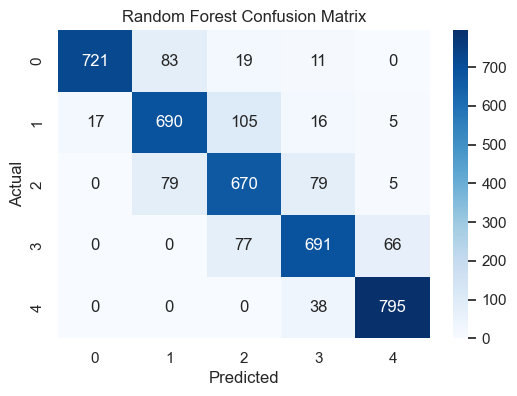

In [327]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, yp_rf_test), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show() # Plotting a confusion matrix to visualize the Random Forest's predictions.

XGBoost Training

In [328]:
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    n_estimators=250,      
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_lambda=4.0,        
    reg_alpha=1.0,         
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb.fit(X_train, y_train) # Initializing and training the XGBoost model with hyperparameters tuned for accuracy and regularization.

,objective,'multi:softprob'
,use_label_encoder,None
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


XGBoost Accuracy

In [329]:
yp_xgb_train = xgb.predict(X_train)
yp_xgb_test = xgb.predict(X_test)

train_acc_xgb = accuracy_score(y_train, yp_xgb_train)
test_acc_xgb = accuracy_score(y_test, yp_xgb_test)
print(f"\n---- XGBOOST ----")
print(f"XGBoost Training Accuracy: {train_acc_xgb:.4f}")
print(f"XGBoost Testing Accuracy:  {test_acc_xgb:.4f}")
print(f"Overfit Gap: {abs(train_acc_xgb - test_acc_xgb):.4f}") # Calculating and printing the training and testing accuracy for the XGBoost model.


---- XGBOOST ----
XGBoost Training Accuracy: 0.9736
XGBoost Testing Accuracy:  0.9441
Overfit Gap: 0.0295


XGBoost Classification Report

In [330]:
print("Classification Report (XGBoost):")
print(classification_report(y_test, yp_xgb_test)) # Generating the detailed classification report (precision, recall, f1) for the XGBoost model.

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       834
           1       0.94      0.91      0.93       833
           2       0.91      0.92      0.91       833
           3       0.93      0.94      0.93       834
           4       0.97      0.98      0.98       833

    accuracy                           0.94      4167
   macro avg       0.94      0.94      0.94      4167
weighted avg       0.94      0.94      0.94      4167



XGBoost Confusion Matrix

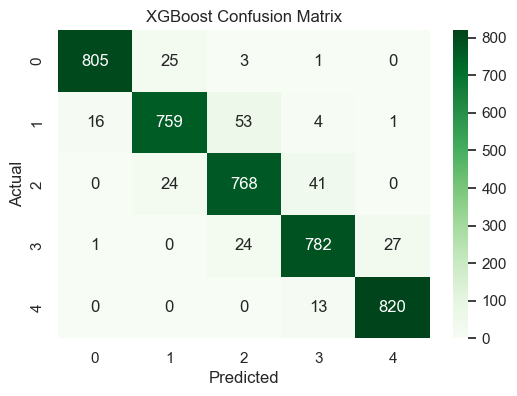

In [331]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, yp_xgb_test), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show() # Plotting the confusion matrix for the XGBoost model's predictions.

## Model Comparison: Random Forest vs. XGBoost
Here we can see Random Forest had a testing accuracy of **0.8560** and XGBoost had a testing accuracy of **0.9441**, which is much higher and much better.

Also, comparing the training accuracy, Random Forest achieved **0.9006**, providing an overfitting gap of **0.0446**. While this isn't very high, we clearly do better with XGBoost. For XGBoost, the training accuracy is **0.9736**, providing an overfitting gap of **0.0295**, which is much lower and better than the Random Forest Model.

Additionally, the macro average precision, recall, and f1-score is **0.86** for Random Forest and **0.94** for XGBoost, which is much more preferable.

Lastly, looking at the confusion matrix of both the models, it's easy to identify that XGBoost rarely misclassified the target, whereas Random Forest did a lot of misclassification, especially between adjacent classes.

# Conclusion
Looking at all this information, we can conclude that using an XGBoost model with a testing accuracy of **0.9441** is the best choice for this dataset.